In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the cleaned data
df = pd.read_csv('/content/drive/MyDrive/DSML_Projects/flipkart_sales/flipkart_sales_cleaned.csv')

df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [3]:
df.head()

,CustomerID,OrderID,ProductName,Category,Price(INR),QuantitySold,TotalSales(INR),OrderDate,PaymentMethod,CustomerRating
0,CUST_0265,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,CUST_0009,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,CUST_0226,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,CUST_0043,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,CUST_0122,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1


In [5]:
# Summary statistics for numerical columns
print(df.describe())

         Price(INR)  QuantitySold  TotalSales(INR)  \
count   1000.000000   1000.000000      1000.000000   
mean   24520.258260      3.097000     75213.112740   
min      139.850000      1.000000       419.550000   
25%    12378.905000      2.000000     28581.765000   
50%    24650.015000      3.000000     57358.300000   
75%    35981.925000      4.000000    110618.595000   
max    49911.750000      5.000000    243903.900000   
std    14187.611227      1.410525     59457.598352   

                        OrderDate  CustomerRating  
count                        1000     1000.000000  
mean   2024-08-09 06:44:38.400000        3.011100  
min           2024-02-12 00:00:00        1.000000  
25%           2024-05-14 00:00:00        2.000000  
50%           2024-08-06 12:00:00        3.100000  
75%           2024-11-05 00:00:00        4.000000  
max           2025-02-09 00:00:00        5.000000  
std                           NaN        1.145408  


In [6]:
# Unique categories and top-selling ones
print(df['Category'].value_counts())

# Count of unique products
print("Total Unique Products:", df['ProductName'].nunique())

# Payment method distribution
print(df['PaymentMethod'].value_counts())

Category
Electronics       217
Books             209
Home & Kitchen    193
Beauty            192
Clothing          189
Name: count, dtype: int64
Total Unique Products: 25
PaymentMethod
UPI            176
Wallet         172
Debit Card     171
COD            169
Net Banking    166
Credit Card    146
Name: count, dtype: int64


In [7]:
def plot_sales_trends(df):
    df['OrderMonth'] = df['OrderDate'].dt.to_period("M")
    monthly_sales = df.groupby('OrderMonth')['TotalSales(INR)'].sum()

    plt.figure(figsize=(12,6))
    sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o")
    plt.xticks(rotation=45)
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Revenue (INR)")
    plt.show()

In [8]:
def top10products(df):
    top_products = df.groupby('ProductName')['TotalSales(INR)'].sum().nlargest(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_products.values, y=top_products.index)
    plt.title("Top 10 Best-Selling Products")
    plt.xlabel("Total Revenue")
    plt.ylabel("Product Name")
    plt.show()

In [9]:
def top_categories(df):
    top_categories = df.groupby('Category')['TotalSales(INR)'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_categories.values, y=top_categories.index)
    plt.title("Top Categories")
    plt.xlabel("Total Revenue")
    plt.ylabel("Category")
    plt.show()

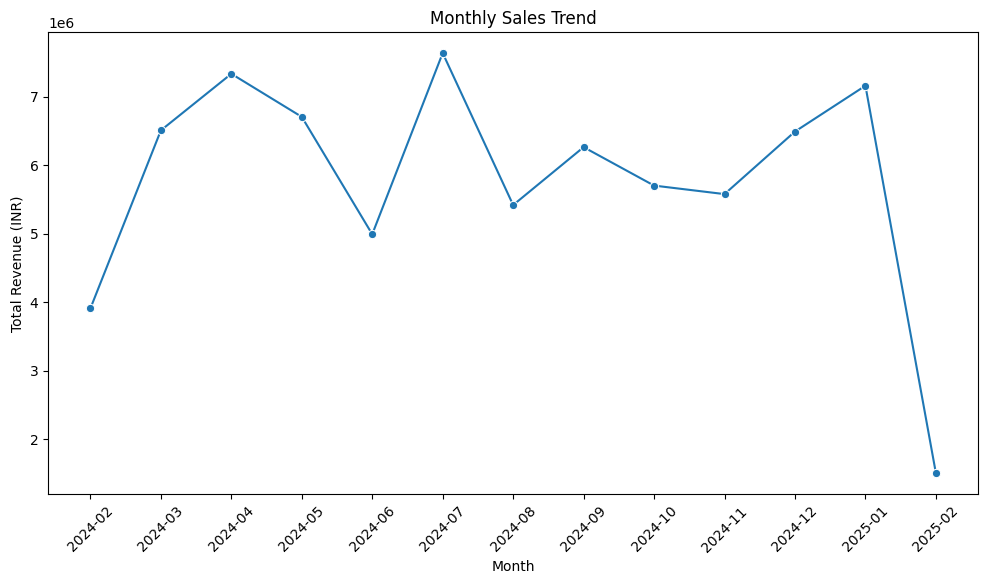

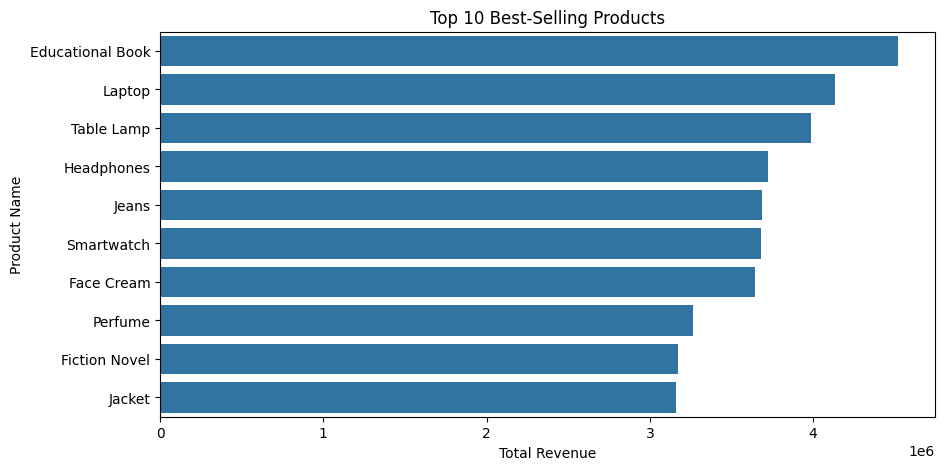

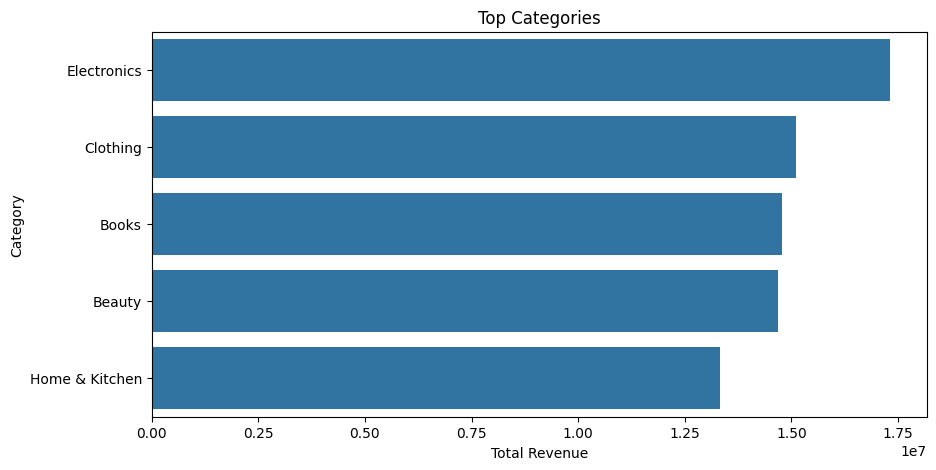

In [10]:
# Sales analysis
plot_sales_trends(df)
top10products(df)
top_categories(df)

In [11]:
#Distribution of Customer Rating

def customer_rating(df):
  plt.figure(figsize=(8, 5))
  sns.histplot(df['CustomerRating'], bins=5, kde=True)
  plt.xticks(np.arange(0, 6, 1))
  plt.title("Distribution of Customer Ratings")
  plt.xlabel("Rating")
  plt.ylabel("Frequency")
  plt.show()


#Average Customer Ratings per Category

def category_ratings(df):
  category_ratings = df.groupby('Category')['CustomerRating'].mean().sort_values(ascending=False)
  plt.figure(figsize=(12, 6))
  sns.barplot(x=category_ratings.index, y=category_ratings.values, palette="coolwarm")
  plt.xticks(rotation=45)
  plt.title("Average Customer Rating per Category")
  plt.xlabel("Category")
  plt.ylabel("Average Rating")
  plt.show()


#Customer Rating Impact on Sales

df['OrderDate'] = pd.to_datetime(df['OrderDate'])  # Ensure date format
df['YearMonth'] = df['OrderDate'].dt.to_period('M')  # Group by Month-Year

def rating_trend(df):
  rating_trend = df.groupby('YearMonth')['CustomerRating'].mean()

  plt.figure(figsize=(12, 5))
  sns.lineplot(x=rating_trend.index.astype(str), y=rating_trend.values, marker="o", color='blue')
  plt.xticks(rotation=45)
  plt.title("Average Customer Rating Over Time")
  plt.xlabel("Month-Year")
  plt.ylabel("Average Rating")
  plt.grid(True)
  plt.show()


#No. of Ratings per Over Time

def rating_over_time(df):
  rating_count = df.groupby('YearMonth')['CustomerRating'].count()
  plt.figure(figsize=(12, 5))
  sns.lineplot(x=rating_count.index.astype(str), y=rating_count.values, marker="o", color='red')
  plt.xticks(rotation=45)
  plt.title("Number of Ratings Over Time")
  plt.xlabel("Month-Year")
  plt.ylabel("Number of Ratings")
  plt.grid(True)
  plt.show()

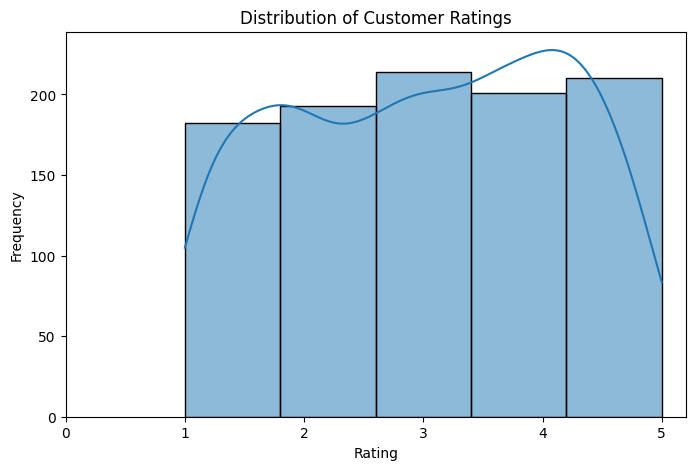

<ipython-input-11-36b941a6e24f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.index, y=category_ratings.values, palette="coolwarm")


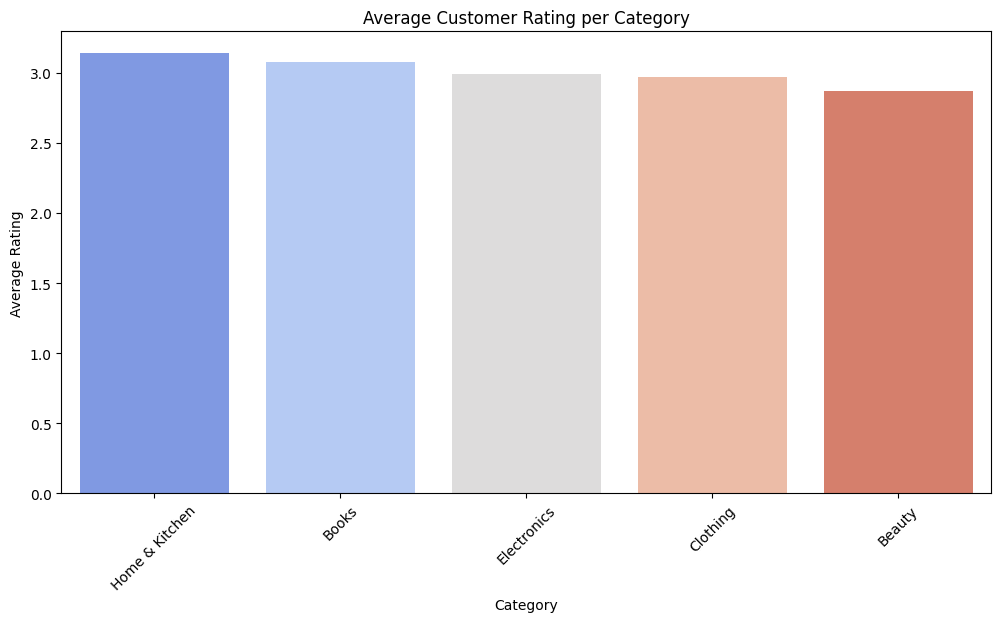

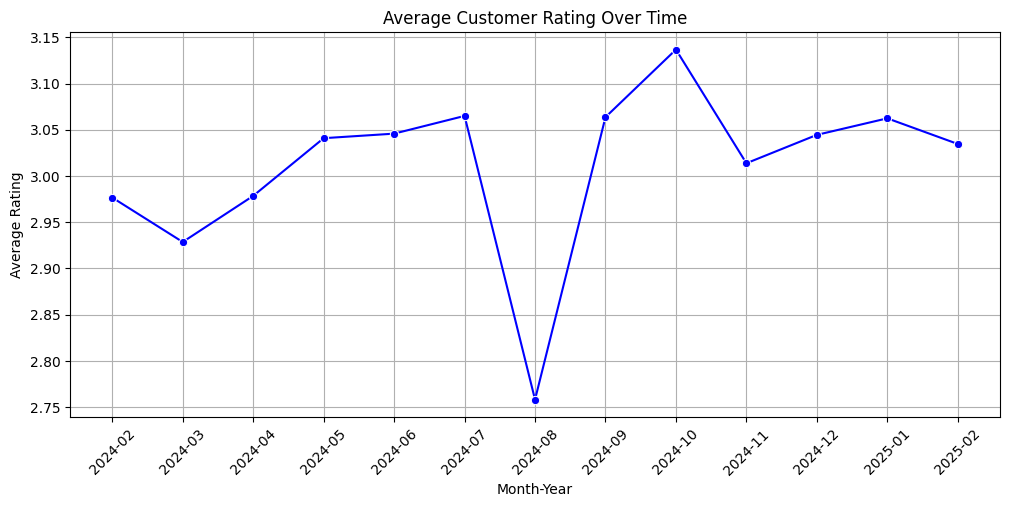

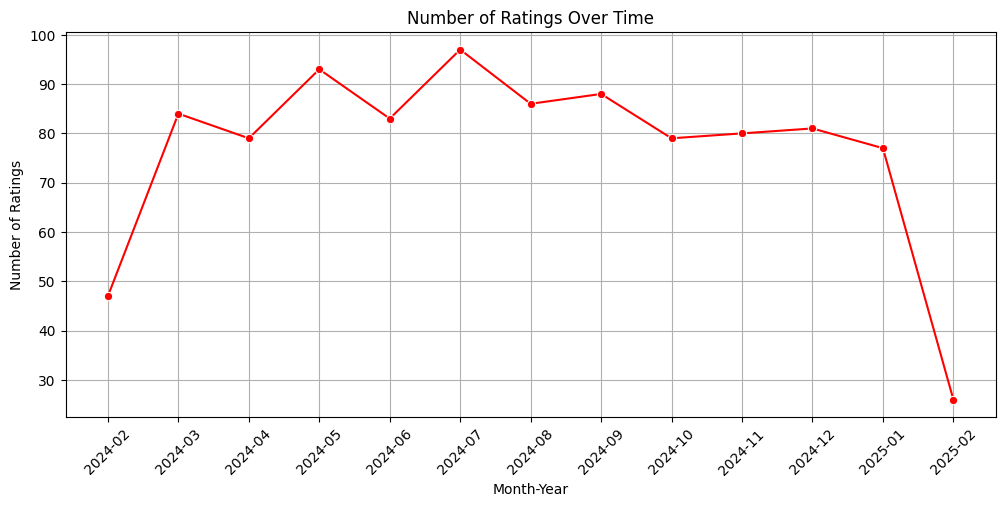

In [12]:
#Customer Rating Analysis
customer_rating(df)
category_ratings(df)
rating_trend(df)
rating_over_time(df)